In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
df = pd.read_csv('/content/Telco_customer_churn.csv')

In [ ]:
df.head()

In [ ]:
df.drop('customerID', axis=1, inplace=True)

In [ ]:
df.dtypes

In [ ]:
df.shape

In [ ]:
df.TotalCharges.values

In [ ]:
df.MonthlyCharges.values

In [ ]:
pd.to_numeric(df.TotalCharges, errors='coerce').isnull()

In [ ]:
df[pd.to_numeric(df.TotalCharges, errors='coerce').isnull()]

In [ ]:
df.iloc[488]

In [ ]:
df1 = df[df.TotalCharges!='']

In [ ]:
df1.shape

In [ ]:
df1_TotalCharges = pd.to_numeric(df1.TotalCharges, errors='coerce')

In [ ]:
df1_TotalCharges.dtypes

In [ ]:
tenure_no_churn= df1[df1.Churn=='No'].tenure
tenure_no_churn

In [ ]:
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure
tenure_churn_yes

In [ ]:
plt.hist([tenure_churn_yes,tenure_no_churn],color=['green','red'],label=['ChurnYes','ChurnNo'])
plt.xlabel('tenure')
plt.ylabel('Number of customers')
plt.legend()
plt.show()

In [ ]:
monthly_charges_no_churn = df1[df1.Churn=='No'].MonthlyCharges
monthly_charges_no_churn

In [ ]:
monthly_charges_yes_churn = df1[df1.Churn=='Yes'].MonthlyCharges
monthly_charges_yes_churn

In [ ]:
plt.hist([monthly_charges_no_churn,monthly_charges_yes_churn],color=['green','red'],label=['ChurnYes','ChurnNo'])
plt.xlabel('Monthly Charges')
plt.ylabel('Number of customers')
plt.legend()
plt.show()

In [ ]:
for column in df:
  if df[column].dtypes=='object':
    print(f'{column} : {df[column].unique()}')

In [ ]:
df1.replace('No phone service','No',inplace=True)
df1.replace('No internet service','No',inplace=True)

In [ ]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

In [ ]:
for column in yes_no_columns:
  df1[column].replace({'Yes':1,'No':0},inplace=True)

In [ ]:
for col in df1:
  print(f'{col}:{df1[col].unique()}')

In [ ]:
df1['gender'].replace({'Female':1,'Male': 0},inplace=True)

In [ ]:
#One hot encoding
df2= pd.get_dummies(data=df1,columns=['InternetService','Contract','PaymentMethod'],dtype=int)

In [ ]:
df2.columns

In [ ]:
df2.head()

In [104]:
#Scaling
scale = ['tenure','MonthlyCharges','TotalCharges']
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()


In [106]:
df2[scale] = df2[scale].replace(' ', np.nan).astype(float)
df2[scale] = df2[scale].fillna(df2[scale].mean())

In [107]:
df2[scale] = scaler.fit_transform(df2[scale])

In [109]:
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.013889,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0.472222,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0.027778,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0.625000,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,0.027778,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [110]:
for col in df2:
  print(f'{col}: {df2[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.01388889 0.47222222 0.02777778 0.625      0.11111111 0.30555556
 0.13888889 0.38888889 0.86111111 0.18055556 0.22222222 0.80555556
 0.68055556 0.34722222 0.95833333 0.72222222 0.98611111 0.29166667
 0.16666667 0.41666667 0.65277778 1.         0.23611111 0.375
 0.06944444 0.63888889 0.15277778 0.97222222 0.875      0.59722222
 0.20833333 0.83333333 0.25       0.91666667 0.125      0.04166667
 0.43055556 0.69444444 0.88888889 0.77777778 0.09722222 0.58333333
 0.48611111 0.66666667 0.40277778 0.90277778 0.52777778 0.94444444
 0.44444444 0.76388889 0.51388889 0.5        0.56944444 0.08333333
 0.05555556 0.45833333 0.93055556 0.31944444 0.79166667 0.84722222
 0.19444444 0.27777778 0.73611111 0.55555556 0.81944444 0.33333333
 0.61111111 0.26388889 0.75       0.70833333 0.36111111 0.
 0.54166667]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: 

In [163]:
x = df2.drop(columns='Churn', axis=1)
y = df2['Churn']

In [164]:
x = x.apply(pd.to_numeric, errors='coerce')

In [165]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=2,stratify=y)

In [166]:
x.shape,X_train.shape,X_test.shape

((7043, 26), (5634, 26), (1409, 26))

In [167]:
y.shape,y_train.shape,y_test.shape

((7043,), (5634,), (1409,))

In [168]:
len(X_train.columns)

26

In [174]:
model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu'),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(1, activation = 'sigmoid'),
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train,y_train,epochs =100)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


177/177 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7366 - loss: 0.5296
Epoch 2/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7863 - loss: 0.4399
Epoch 3/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7952 - loss: 0.4280
Epoch 4/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8040 - loss: 0.4244
Epoch 5/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8056 - loss: 0.4211
Epoch 6/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8145 - loss: 0.4104
Epoch 7/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8054 - loss: 0.4165
Epoch 8/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8033 - loss: 0.4183
Epoch 9/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8058 - loss: 0.4028
Epoch 10/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7983 - loss: 0.4232
Epoch 11/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8134 - loss: 0.4036
Epoch 12/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

In [175]:
model.evaluate(X_test,y_test)

45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7741 - loss: 0.4662


[0.45955678820610046, 0.7757274508476257]

In [182]:
yp = model.predict(X_test)
yp[:5]

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[0.37430698],
       [0.7588519 ],
       [0.22138849],
       [0.05108764],
       [0.6148548 ]], dtype=float32)

In [178]:
y_test[:5]

,Churn
6306,0
3424,1
4012,1
5322,0
333,1


In [179]:
y_pred = []
for element in yp:
  if element > 0.5:
    y_pred.append(1)
  else:
    y_pred.append(0)

In [180]:
y_pred[:5]

[0, 1, 0, 0, 1]

In [183]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.84      0.85      1035
           1       0.58      0.59      0.58       374

    accuracy                           0.78      1409
   macro avg       0.71      0.72      0.71      1409
weighted avg       0.78      0.78      0.78      1409



Text(95.72222222222221, 0.5, 'Truth')

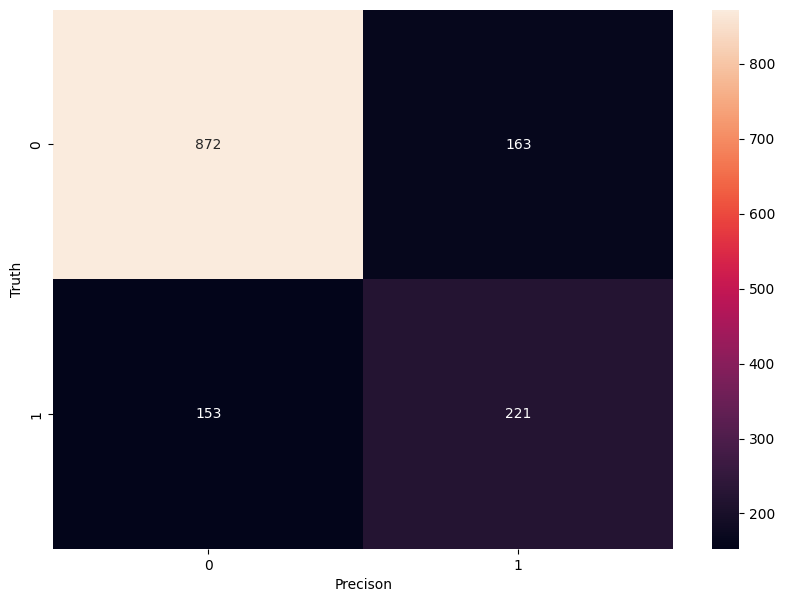

In [187]:
import seaborn as sns
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True, fmt='d')
plt.xlabel('Precison')
plt.ylabel('Truth')